# Data 602 Midterm

# Selecting the Best Wine 

### Abstract

Using a dataset of the chemical characteristics of vinho verde wines, this project aimed to determine the general quality of the wine, as good, bad, or okay. The target category was determined based on the the quality variable of the original dataset, which used sensory data to score wines on a scale of 0 to 10, 0 being the worst and 10 being best. The size of the dataset is <b> 6,497 rows and 13 columns </b>, with 12 columns representing the attributes of the wine, including whether it is red or white (predictors) and 1 representing the quality (target). Ultimately, a random forest model was used, resulting in prediction accuracy of 78% (+/- 0.03).

### Introduction

The aim of this project is to apply classification machine learning methods to produce a predicive model. To do this, I utilized a dataset containing the chemical characteristics of wine in order to determine the quality of said wine. The dataset consistes of red and white varieties of a Prtuguese wine, Vino Verde and includes information on acidity, sugar content, density, pH, alcohol content, and other chemical components, such as sulfides and chlorides. 

The analysis consisted of comparing multiple machine learning models, to identify the one with the highest accuracy, and then to perform feature selection to further improve the interpretability and accuracy of the model. 

Data were retrieved from https://archive.ics.uci.edu/ml/datasets/Wine+Quality in the form of two distinct sets, one for red and one for white. 

#### My research questions were: 
1. Is a given wine good, bad, or just okay? 
2. What factors/features influence the quality determination of the wine?
3. What model will produce the most accuracy in predicting wine quality?

### Motivation

As I was considering what data to use for this project, I ran into the Wine quality data set and was inspired by a recent struggle I had. I am not a big wine drinker, and to me, all wine is relatively the same. HOWEVER, two weeks ago, I married my now husband, who comes from a long line of Italians, and, not too stereotype, but they take their wine very seriously. The motivation for this project comes from the very real struggle I faced when selecting the wine for my wedding (although this became less stressful as the pandemic greatly decreased the guest list. Silver linings...). It is my believe that a simple tool which takes the chemical components of a wine, and tells the user whether or not the wine would be considered high quality, would be extremely useful for those of us who have low wine knowledge but a desire to appear knowledgeable to our in-laws (an eternal struggle). 

### Proposed method

The methods used in this workbook include comparing 3 machine learning models for classification: logistic regression, decision trees, and random forest. The Sklearn library was used to perform the majority of the analyses, while matplotlib was used to render visuals.

The data was split into train and test data, with 5%, or 325 rows of the data held back for test data. Each model was trained using the train data and accuracy of the model was determined based on the test data.

For my purposes, to create a simple instruction on whether the wine is good, bad, or okay, I grouped the quality scores below 4 out of 10 in the bad wine category, the 5 and 6 scores in the okay wine category, and scores 7 and over in the good wine category. This selection was based on the range of actual values in the dataset, which were 3 to 9. This way, the model gives a simple prediction that is easier to interpret.

Each model was tested for accuracy, and the model with the highest accuracy, Random Forest, was selected. The model was then further honed using feature selection, which narrowed down the features used in the analysis to 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', and 'alcohol', 7 out of 12 features. 

### Data Cleaning
Find the Data Cleaning notebook here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Initial%20Data%20Cleaning.ipynb'>Data Cleaning Notebook</a>
### Exploratory Data Analysis and Modeling
Detailed exploratory analysis here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Exploratory%20Analysis.ipynb'>Exploratory Analysis Notebook</a>

For a brief review of the data exploration, including demonstrations of the models attempted, scroll down.


### Limitations and later work.

The dataset consistes of red and white varieties of a portuguese wine, vinho verde and the model may not generalize to other types of wine. Additionally, the quality of the wine is based on the features valued in vinho verde specifically, and may not translate to other types of wine. 

In addition to whether or not the results translate to other wine types, the data is not evenly distributed, with far mor average wines than particularly good or bad wines. I chose not to weight the model because doing so did not improve accuracy. However, as a result, my model works well for good and okay wine, but was unable to accurately identify bad wines. 

To improve this result, future work should aim at expanding the data set to include a wider variety of wine qualities, and therefore improve predictive accuracy for the more extreme outcomes.

### References and contributions

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

I used several blogs and guides to understand the sklearn library. This are listed here:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Documentation for RandomForestClassifier)
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation (Documentation for cross validation)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Documentation for LogisticRegression)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Documentation for classification_report)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Documentation for confusion_matrix)
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html (Documentation for feature scaling)

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn (plotting a random forest example)
https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels (visualizing confusion matrix)
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f (feature selection with random forest models)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
from sklearn import tree #used to produce decision trees and their visualizations
from sklearn.model_selection import train_test_split #used to split the data into train and test subgroups
from sklearn.ensemble import RandomForestClassifier #Used to fit a random forest model
from sklearn.linear_model import LogisticRegression #Used to fit a logistic regression model
from sklearn.feature_selection import SelectFromModel #Used for feature selection

import timeit
start_time = timeit.default_timer()

In [2]:
#import my data
winesdf = pd.read_csv('./WinesData.csv')
winesdf.head() #view the data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,categories
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,just okay wine
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,just okay wine
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,just okay wine
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,just okay wine
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,just okay wine


In [3]:
winesdf.shape

(6497, 14)

In [4]:
#Distribution of categories
winesdf['categories'].value_counts()

just okay wine    4974
good wine         1277
bad wine           246
Name: categories, dtype: int64

### Brief Exploratory Data Analysis   
Summary of results:

Decision Tree model
- Accuracy: 0.77 (+/- 0.04)

Random Forest model
- Accuracy: 0.78 (+/- 0.03)

Logistic Regression model
- Accuracy: 0.77 (+/- 0.03)

I start by testing the decision tree model:

In [5]:
# Bring in function from .py file
%run MidtermFunctions.py

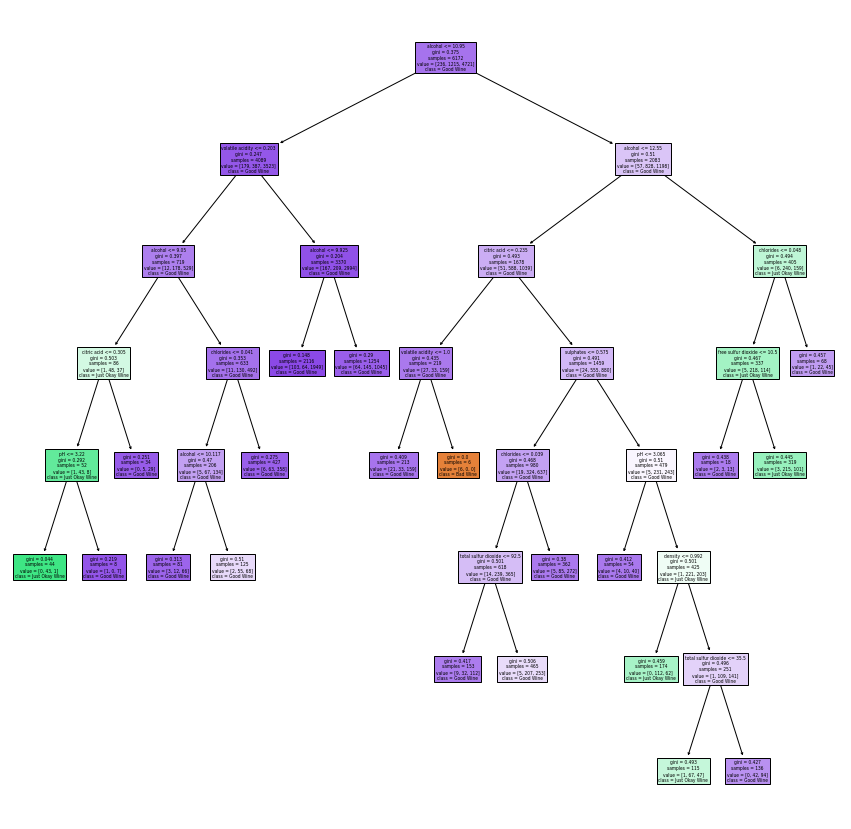

In [6]:
varlist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']

X = winesdf[varlist]
y = winesdf['categories']

#get training set, set asside test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state=10) 
#due to the size of the dataset, I decided that 325 rows were enough to test on after trying it on 650 and finding no differences
#I chose  kto set the random_state to keep the results conistent so that the results would be consistent across
estimator = tree.DecisionTreeClassifier(max_leaf_nodes = 20)
estimator = estimator.fit(X_train, y_train)

draw_tree(estimator, varlist, 'decisiontree.png')

Accuracy: 0.77 (+/- 0.04)
Classification Report
                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.57      0.27      0.37        62
just okay wine       0.81      0.95      0.88       253

      accuracy                           0.79       325
     macro avg       0.46      0.41      0.42       325
  weighted avg       0.74      0.79      0.75       325



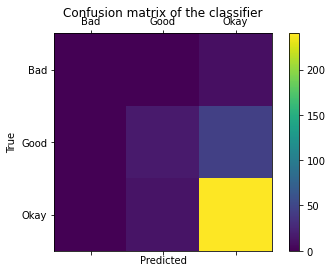

In [7]:
Accuracy(estimator, X, y, 10, X_test,y_test) # I used 10 fold based on best practice guidelines
VizConfusionMatrix(estimator, X_test, y_test) #visualize the confusion matrix

Next I tested the Random Forest Method:

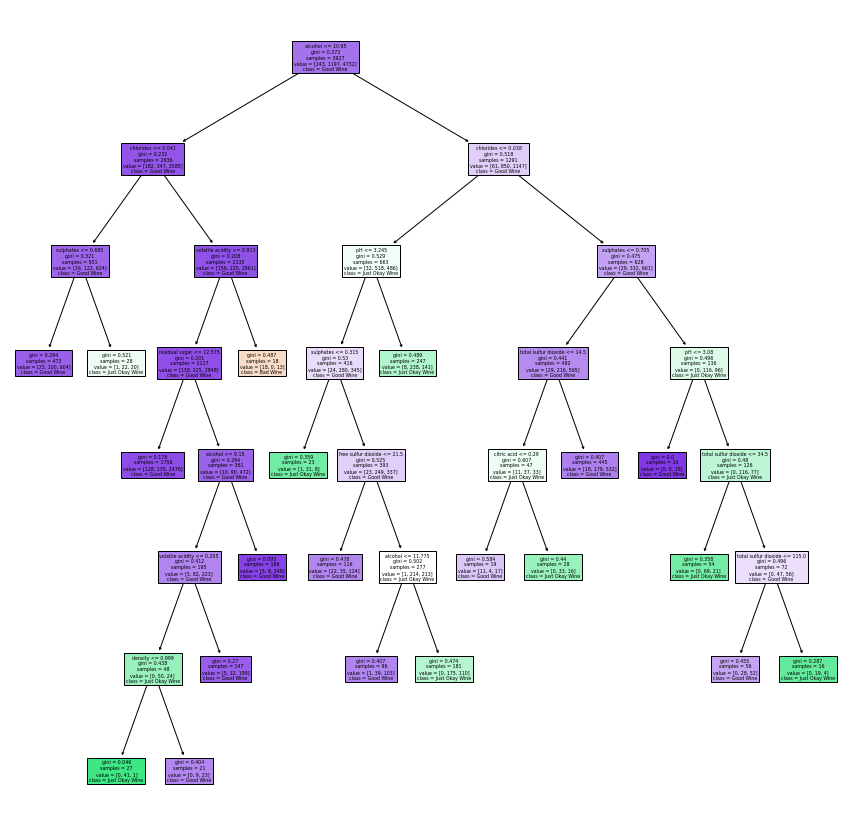

In [8]:
estimator = RandomForestClassifier(max_leaf_nodes=20)
estimator = estimator.fit(X_train, y_train)

draw_tree(estimator.estimators_[0], varlist, 'RandomForest.png') #Needed to select one of the random forest trees to model for this section

Accuracy: 0.78 (+/- 0.03)
Classification Report
                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.79      0.24      0.37        62
just okay wine       0.81      0.98      0.89       253

      accuracy                           0.81       325
     macro avg       0.53      0.41      0.42       325
  weighted avg       0.78      0.81      0.76       325



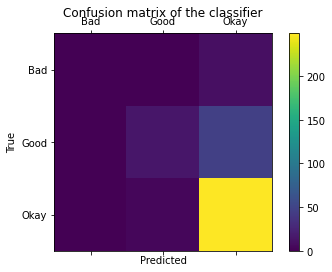

In [9]:
Accuracy(estimator, X, y, 10, X_test,y_test)
VizConfusionMatrix(estimator, X_test, y_test) #visualize the confusion matrix

Finally, I tested the logistic regression method:

Accuracy: 0.77 (+/- 0.03)
Classification Report
                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.71      0.27      0.40        62
just okay wine       0.82      0.97      0.89       253

      accuracy                           0.81       325
     macro avg       0.51      0.42      0.43       325
  weighted avg       0.77      0.81      0.77       325



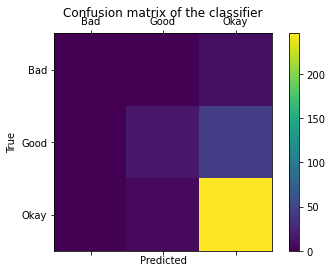

In [10]:
logreg = LogisticRegression(max_iter =10000)
logreg.fit(X_train, y_train)

Accuracy(logreg, X, y, 10, X_test,y_test)
VizConfusionMatrix(logreg, X_test, y_test) #visualize the confusion matrix

Based purely on the accuracy scores, the random forest method is only slightly better than logistic regression. Examining the classification report for each of these models also shows that random forest models have a small advantage in identifying food wine over the logistic regression model, and both are better at identifying 'good wine' than the decision tree model. This, combined with the slightly increased interpretability of a tree model led me to select the random forest to proceed with the analysis. 

### Feature engineering

Below, I use the SelectFromModel function from sklearn to identify the important features in the dataset, and I refit the random forest model to the data with those features. This resulted in a slight decrease to the precision of the model, while the overall accuracy remained about the same, Accuracy: 0.78 (+/- 0.04). However, for the sake of a cleaner model, I jchose to use the fewer features. 

In [11]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 12))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())] #determine which features are important to the predictor
print(selected_feat) #show the features determined to be important

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


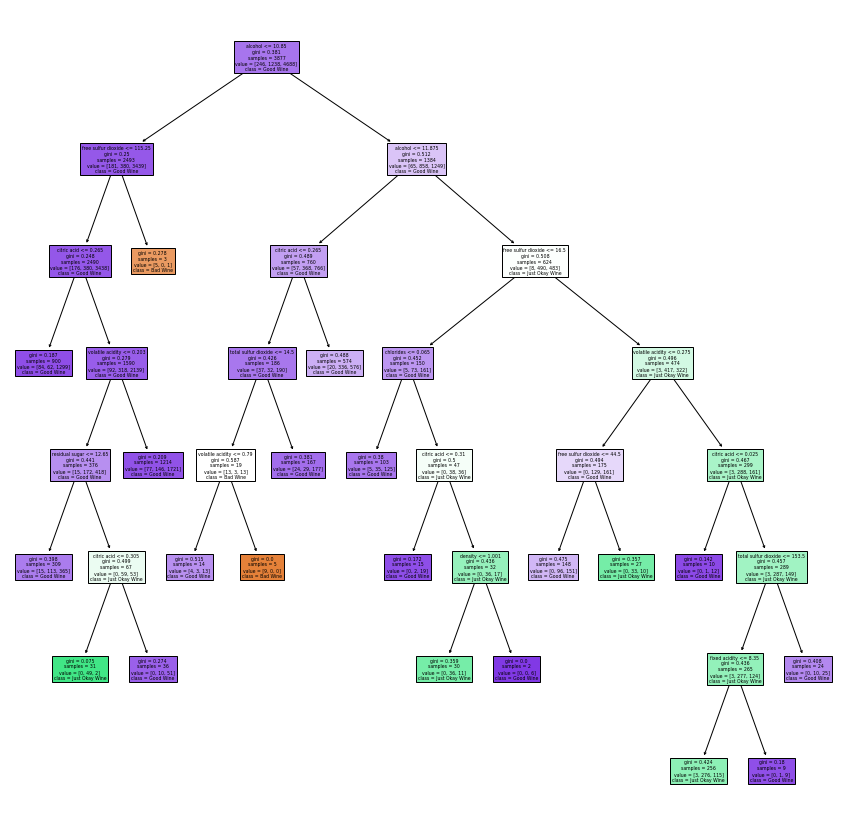

In [12]:
X = winesdf[selected_feat]
y = winesdf['categories']

estimator = RandomForestClassifier(max_leaf_nodes=20)
estimator = estimator.fit(X_train, y_train)

draw_tree(estimator.estimators_[0], varlist, 'RandomForest_select_variables.png') #Needed to select one of the random forest trees to model for this section

Accuracy: 0.77 (+/- 0.04)
Classification Report
                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.82      0.23      0.35        62
just okay wine       0.81      0.99      0.89       253

      accuracy                           0.81       325
     macro avg       0.55      0.40      0.42       325
  weighted avg       0.79      0.81      0.76       325



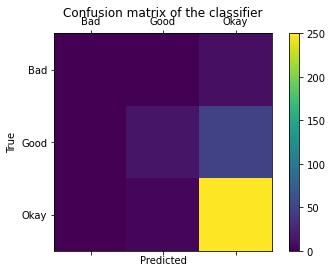

In [13]:
Accuracy(estimator, X, y, 10, X_test,y_test)
VizConfusionMatrix(estimator, X_test, y_test) #visualize the confusion matrix

### Results and discussion

Upon comparing three types of models, decision tree, logistic regression, and random forest, the random forest model was moderately more accurate than the logistic regression when applied to the test data. This was therefore selected as the model to proceed with and feature selection was applied. 

None of the models were able to accurately predict wines that were bad quality, likely due to the low number of bad wines in the dataset. Attemts to weight the classes using the class_weight attribute of the sklearn model functions failed to improve the results and decrease accuracy considerably. 

### summary

Using the wine quality dataset, this project aimed to determine the general quality of the wine, as good, bad, or okay. The target category was determined based on the the quality variable of the original dataset, which used sensory data to score wines on a scale of 0 to 10, 0 being the worst and 10 being best. The grouping was determined based on the range of scores in the data (3 to 9) and the desire for simple categorical labels as the output. Again, the size of the dataset was 6,497 rows and 12 columns with 11 columns representing the chemical attributes of the wine (predictors) and 1 representing the quality (target).

During data exploration, logistic regression, decision tree, and random forest models were tested to determine which would produce the most accurate predictions. The random forest model performed the best in terms of accuracy, and since the aim is to obtain accurate predictions than to understand exactly why the wine is good or bad, I chose to use the more accurate method. Finally, I used the feature selection module in sklearn to identify the most important features and did not strongly affect the accuracy. I chose to keep only those selected features in the model, however, in order to increase simplicity and interpretability.

### Conclusion

Based on the outcome of these analysis, this model is usable to rouphly predict whether a wine is good or just okay, but not to predict if wines are outright bad. This is likely not sufficient to impress my in-laws, but may work for less discerning judges. Additional data is needed on the characteristics of bad wine in order to improve the accuracy of the model. 